In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
target_questions = [
  'Is the application deadline the same for international students?',
  'Can I apply without formal prerequisite coursework?',
  'Are there teaching or research assistantships available?',
  'What is the typical GPA of admitted students?',
  'What job positions do graduates typically get?',
  'What financial aid options are available for international students?'
]

In [9]:
bot_responses = [
  'Yes, the application deadline of March 1st is the same for both domestic and international students.',
  'While we do prefer to see formal coursework in the prerequisite areas of Inferential Statistics, Linear Algebra, and Programming, you can still apply without it. However, it would be very unlikely for a candidate to be admitted if they lacked such courses in all three subject areas. Keep in mind that you must have completed all required prerequisite courses before the start of the program. You may apply with courses in progress provided that they will be completed by the time the program begins.',
  'Thanks for your question. Unfortunately, the MSDS program does not offer teaching or research assistantships. Due to the programs intensity, we actually recommend that students focus fully on the program and not seek outside work.Regarding financial aid, the program does offer scholarships for admitted candidates, which can cover a maximum of 20 percent of tuition. All admitted students are automatically considered, so there is no separate application required. Please note that these scholarships cannot be combined with other USF scholarships like the Double Dons discount. We dont have specific grants for refugees, so we recommend looking into external funding options.',
  'The average undergraduate GPA of admitted students is 3.43. I hope this is helpful!',
  'Great question! Our graduates typically land positions as data scientists, machine learning engineers, data engineers, and AI engineers. The program focuses on building technical expertise and business acumen, so students are well-prepared for these roles. Also, the nine-month practicum with real companies can be a great resume builder and lead to job opportunities. I hope this helps!',
  'For international students, the MSDS program does offer scholarships for admitted candidates, which can cover a maximum of 20% of tuition. All admitted students are automatically considered for these scholarships, so there is no separate application required. Unfortunately, the Double Dons discount cannot be combined with the program scholarship. Therefore, I recommend also looking into external scholarships or private loans to help finance your education. If you plan to finance your education with a loan, you will need to obtain a letter from your bank stating that they will provide a loan for the needed amount if you are admitted. You can upload this letter to the certification of finances section of the application. If you are unable to provide a letter, please contact asapplication@usfca.edu for other options.'
]

In [10]:
golden_responses = [
  'Yes. This also applies to international students.',
  'We do prefer to see formal coursework in all three areas of prerequisites. It would be very unlikely for a candidate to be admitted if they lacked such courses in all three subject areas.',
  'No, the MSDS program does not offer teaching or research assistantships.',
  'The average undergraduate GPA for admitted students is 3.43',
  'Data Scientist, Machine Learning Engineer, Data Engineer, Software Engineer, Senior Data Scientist, AI Associate, AI/ML Specialist just to name a few',
  'Unfortunately the Double Dons award cannot be stacked with another USF scholarship award, so external scholarships or private loans would be the other financing options for international students'
]

In [5]:
# 1. Calculate TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform on all text to create a common vocabulary
all_text = bot_responses + golden_responses
tfidf_matrix = tfidf_vectorizer.fit_transform(all_text)

# Split the matrix back into bot and golden responses
bot_tfidf = tfidf_matrix[:len(bot_responses)]
golden_tfidf = tfidf_matrix[len(bot_responses):]

In [6]:
similarity_scores = []
for i in range(len(bot_responses)):
    sim = cosine_similarity(bot_tfidf[i:i+1], golden_tfidf[i:i+1])[0][0]
    similarity_scores.append(sim)

In [7]:
# 3. Create a DataFrame with results
results_df = pd.DataFrame({
    'Question': target_questions,
    'Bot Response': bot_responses,
    'Expert Response': golden_responses,
    'Similarity Score': similarity_scores
})

# Sort by similarity score to see which responses match best
results_df_sorted = results_df.sort_values('Similarity Score', ascending=False)

# 4. Print similarity scores for each question
print("Cosine Similarity Scores:")
for i, question in enumerate(target_questions):
    print(f"{i+1}. {question[:50]}...: {similarity_scores[i]:.4f}")

Cosine Similarity Scores:
1. Is the application deadline the same for internati...: 0.3740
2. Can I apply without formal prerequisite coursework...: 0.5266
3. Are there teaching or research assistantships avai...: 0.4053
4. What is the typical GPA of admitted students?...: 0.8173
5. What job positions do graduates typically get?...: 0.2046
6. What financial aid options are available for inter...: 0.2546


In [8]:
average_similarity = np.mean(similarity_scores)
print(f"\nAverage cosine similarity: {average_similarity:.4f}")


Average cosine similarity: 0.4304


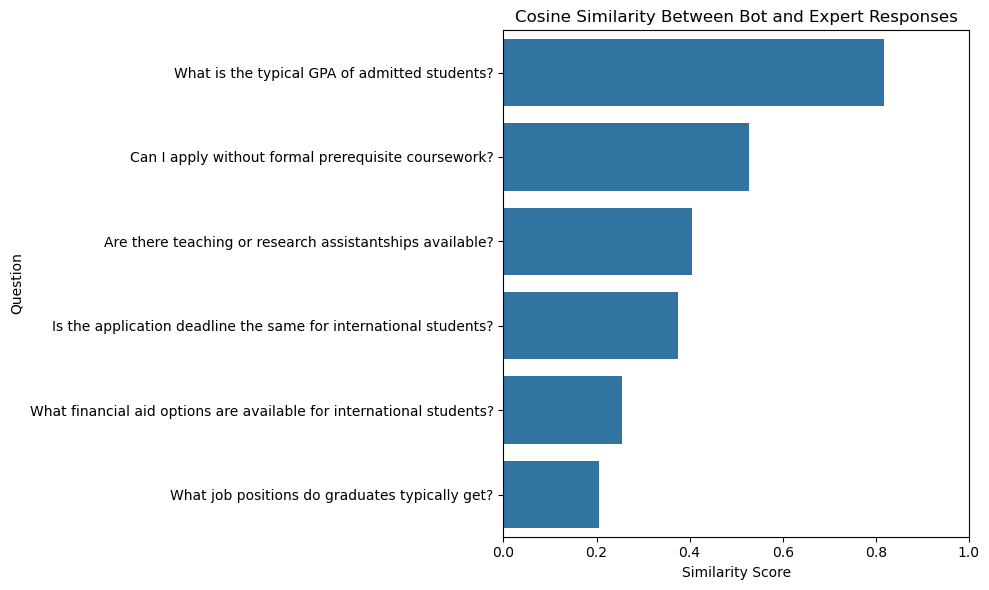

In [9]:
# 6. Visualize the similarities
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity Score', y='Question', data=results_df_sorted)
plt.title('Cosine Similarity Between Bot and Expert Responses')
plt.xlabel('Similarity Score')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [10]:
# Find the lowest similarity pair
lowest_sim_idx = np.argmin(similarity_scores)
lowest_sim_question = target_questions[lowest_sim_idx]
lowest_sim_bot = bot_responses[lowest_sim_idx]
lowest_sim_expert = golden_responses[lowest_sim_idx]

print("\nDetailed analysis of the lowest similarity pair:")
print(f"Question: {lowest_sim_question}")
print(f"Bot response: {lowest_sim_bot}")
print(f"Expert response: {lowest_sim_expert}")
print(f"Similarity score: {similarity_scores[lowest_sim_idx]:.4f}")


Detailed analysis of the lowest similarity pair:
Question: What job positions do graduates typically get?
Bot response: Great question! Our graduates typically land positions as data scientists, machine learning engineers, data engineers, and AI engineers. The program focuses on building technical expertise and business acumen, so students are well-prepared for these roles. Also, the nine-month practicum with real companies can be a great resume builder and lead to job opportunities. I hope this helps!
Expert response: Data Scientist, Machine Learning Engineer, Data Engineer, Software Engineer, Senior Data Scientist, AI Associate, AI/ML Specialist just to name a few
Similarity score: 0.2046


In [11]:
def compare_key_terms(text1, text2, vectorizer, top_n=10):
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get term scores for each text
    scores1 = vectorizer.transform([text1]).toarray()[0]
    scores2 = vectorizer.transform([text2]).toarray()[0]
    
    # Create DataFrame with terms and scores
    term_comparison = pd.DataFrame({
        'Term': feature_names,
        'Bot Score': scores1,
        'Expert Score': scores2,
        'Difference': abs(scores1 - scores2)
    })
    
    # Sort by difference
    return term_comparison.sort_values('Difference', ascending=False).head(top_n)

print("\nKey vocabulary differences in lowest similarity pair:")
vocab_diff = compare_key_terms(
    lowest_sim_bot, 
    lowest_sim_expert, 
    tfidf_vectorizer
)
print(vocab_diff)


Key vocabulary differences in lowest similarity pair:
          Term  Bot Score  Expert Score  Difference
45    engineer   0.000000      0.547145    0.547145
46   engineers   0.456192      0.000000    0.456192
122  scientist   0.000000      0.364763    0.364763
61       great   0.304128      0.000000    0.304128
35        data   0.261189      0.469895    0.208706
6           ai   0.130594      0.313263    0.182669
126     senior   0.000000      0.182382    0.182382
85          ml   0.000000      0.182382    0.182382
70        just   0.000000      0.182382    0.182382
128   software   0.000000      0.182382    0.182382


## Implementation Approach 2

In [2]:
%pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.12-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached cymem-2.0.11-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.5 kB)
  Using cached preshed-3.0.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 16.5 MB/s eta 0:00:00a 0:00:01
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)


In [4]:
%pip install rouge

  Using cached rouge-1.0.1-py3-none-any.whl.metadata (4.1 kB)
Using cached rouge-1.0.1-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import re
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
from rouge import Rouge
from sentence_transformers import SentenceTransformer
import torch

In [6]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/sehej/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sehej/nltk_data...


True

In [11]:
# Function to preprocess text for better comparison
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess all responses
bot_responses_processed = [preprocess_text(resp) for resp in bot_responses]
golden_responses_processed = [preprocess_text(resp) for resp in golden_responses]

In [13]:
# 1. Enhanced Cosine Similarity: Just on key terms instead of full text
def enhanced_cosine_similarity(bot_resp, expert_resp):
    # Create a custom TF-IDF vectorizer with more stopwords and focus on nouns/facts
    custom_stopwords = [
        'thanks', 'hello', 'hi', 'question', 'great', 'thank', 'you', 'hope', 'helpful', 'please',
        'actually', 'just', 'would', 'could', 'may', 'might', 'glad', 'happy', 'can'
    ]
    
    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), 
                           token_pattern=r'\b[a-zA-Z][a-zA-Z]+\b')
    
    # Adding both texts to ensure the same vocabulary
    tfidf_matrix = tfidf.fit_transform([bot_resp, expert_resp])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

# 2. Keyword Inclusion Score: Check if the bot response includes the key facts
def keyword_inclusion_score(bot_resp, expert_resp):
    # Extract keywords from expert response (simplistic approach)
    expert_tokens = set(expert_resp.lower().split())
    bot_tokens = set(bot_resp.lower().split())
    
    # Filter out common stopwords
    stopwords = set([
        'the', 'is', 'in', 'it', 'and', 'to', 'a', 'of', 'for', 'are', 'be',
        'this', 'that', 'with', 'on', 'at', 'by', 'from', 'an', 'as', 'or'
    ])
    
    expert_keywords = expert_tokens - stopwords
    
    # Count how many expert keywords are in the bot response
    matches = sum(1 for word in expert_keywords if word in bot_tokens)
    
    # Return percentage of expert keywords included
    if len(expert_keywords) == 0:
        return 1.0  # Perfect match if no keywords to match
    
    return matches / len(expert_keywords)

# 3. Semantic Similarity with Sentence Transformers
def semantic_similarity(bot_resp, expert_resp):
    # Load pre-trained model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Calculate embeddings
    bot_embedding = model.encode(bot_resp, convert_to_tensor=True)
    expert_embedding = model.encode(expert_resp, convert_to_tensor=True)
    
    # Calculate cosine similarity
    cos_sim = torch.nn.functional.cosine_similarity(bot_embedding.unsqueeze(0), 
                                                   expert_embedding.unsqueeze(0))
    
    return cos_sim.item()

# 4. ROUGE Score (Recall-Oriented Understudy for Gisting Evaluation)
def rouge_score(bot_resp, expert_resp):
    rouge = Rouge()
    try:
        scores = rouge.get_scores(bot_resp, expert_resp)[0]
        # Using ROUGE-L which focuses on longest common subsequence
        return scores['rouge-l']['f']
    except:
        # Handle cases where ROUGE calculation might fail
        return 0.0

# 5. BLEU Score (commonly used for machine translation evaluation)
def bleu_score(bot_resp, expert_resp):
    # Tokenize sentences
    bot_tokens = word_tokenize(bot_resp.lower())
    expert_tokens = word_tokenize(expert_resp.lower())
    
    # Calculate BLEU score
    try:
        return sentence_bleu([expert_tokens], bot_tokens, weights=(0.25, 0.25, 0.25, 0.25))
    except:
        return 0.0

# 6. Fact Matching Score
def fact_matching_score(bot_resp, expert_resp):
    # This is a simplified approach - extract numbers and specific phrases
    numbers_pattern = r'\b\d+\.?\d*\b'
    bot_numbers = set(re.findall(numbers_pattern, bot_resp))
    expert_numbers = set(re.findall(numbers_pattern, expert_resp))
    
    # Check for job titles or key phrases
    key_phrases = [
        'data scientist', 'machine learning', 'gpa', 'average', 'prerequisite',
        'teaching assistant', 'research assistant', 'double dons', 'scholarship', 
        'march 1st', 'deadline', 'admitted', 'international', 'tuition', '20%'
    ]
    
    bot_phrases = set([phrase for phrase in key_phrases if phrase.lower() in bot_resp.lower()])
    expert_phrases = set([phrase for phrase in key_phrases if phrase.lower() in expert_resp.lower()])
    
    # Combine and calculate score
    total_expert_items = len(expert_numbers) + len(expert_phrases)
    matched_items = len(bot_numbers.intersection(expert_numbers)) + len(bot_phrases.intersection(expert_phrases))
    
    if total_expert_items == 0:
        return 1.0  # Perfect match if no items to match
        
    return matched_items / total_expert_items


In [14]:
# Calculate all metrics for each response pair
results = []
for i, (bot_resp, expert_resp) in enumerate(zip(bot_responses_processed, golden_responses_processed)):
    enhanced_cos_sim = enhanced_cosine_similarity(bot_resp, expert_resp)
    keyword_score = keyword_inclusion_score(bot_resp, expert_resp)
    semantic_sim = semantic_similarity(bot_responses[i], golden_responses[i])  # Using original text for better context
    rouge = rouge_score(bot_resp, expert_resp)
    bleu = bleu_score(bot_resp, expert_resp)
    fact_score = fact_matching_score(bot_responses[i], golden_responses[i])  # Using original text for better extraction
    
    results.append({
        'Question': target_questions[i],
        'Bot Response': bot_responses[i],
        'Expert Response': golden_responses[i],
        'Enhanced Cosine Similarity': enhanced_cos_sim,
        'Keyword Inclusion': keyword_score,
        'Semantic Similarity': semantic_sim,
        'ROUGE-L Score': rouge,
        'BLEU Score': bleu,
        'Fact Matching': fact_score,
        # Calculate average across all metrics for an overall score
        'Average Score': np.mean([enhanced_cos_sim, keyword_score, semantic_sim, rouge, fact_score])
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display average scores across all metrics
print("Average Scores for Each Metric:")
print(f"Enhanced Cosine Similarity: {results_df['Enhanced Cosine Similarity'].mean():.4f}")
print(f"Keyword Inclusion: {results_df['Keyword Inclusion'].mean():.4f}")
print(f"Semantic Similarity: {results_df['Semantic Similarity'].mean():.4f}")
print(f"ROUGE-L Score: {results_df['ROUGE-L Score'].mean():.4f}")
print(f"BLEU Score: {results_df['BLEU Score'].mean():.4f}")
print(f"Fact Matching: {results_df['Fact Matching'].mean():.4f}")
print(f"Average Overall Score: {results_df['Average Score'].mean():.4f}")


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

/opt/anaconda3/lib/python3.12/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/anaconda3/lib/python3.12/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Average Scores for Each Metric:
Enhanced Cosine Similarity: 0.3284
Keyword Inclusion: 0.7563
Semantic Similarity: 0.7260
ROUGE-L Score: 0.3797
BLEU Score: 0.1479
Fact Matching: 1.0000
Average Overall Score: 0.6381


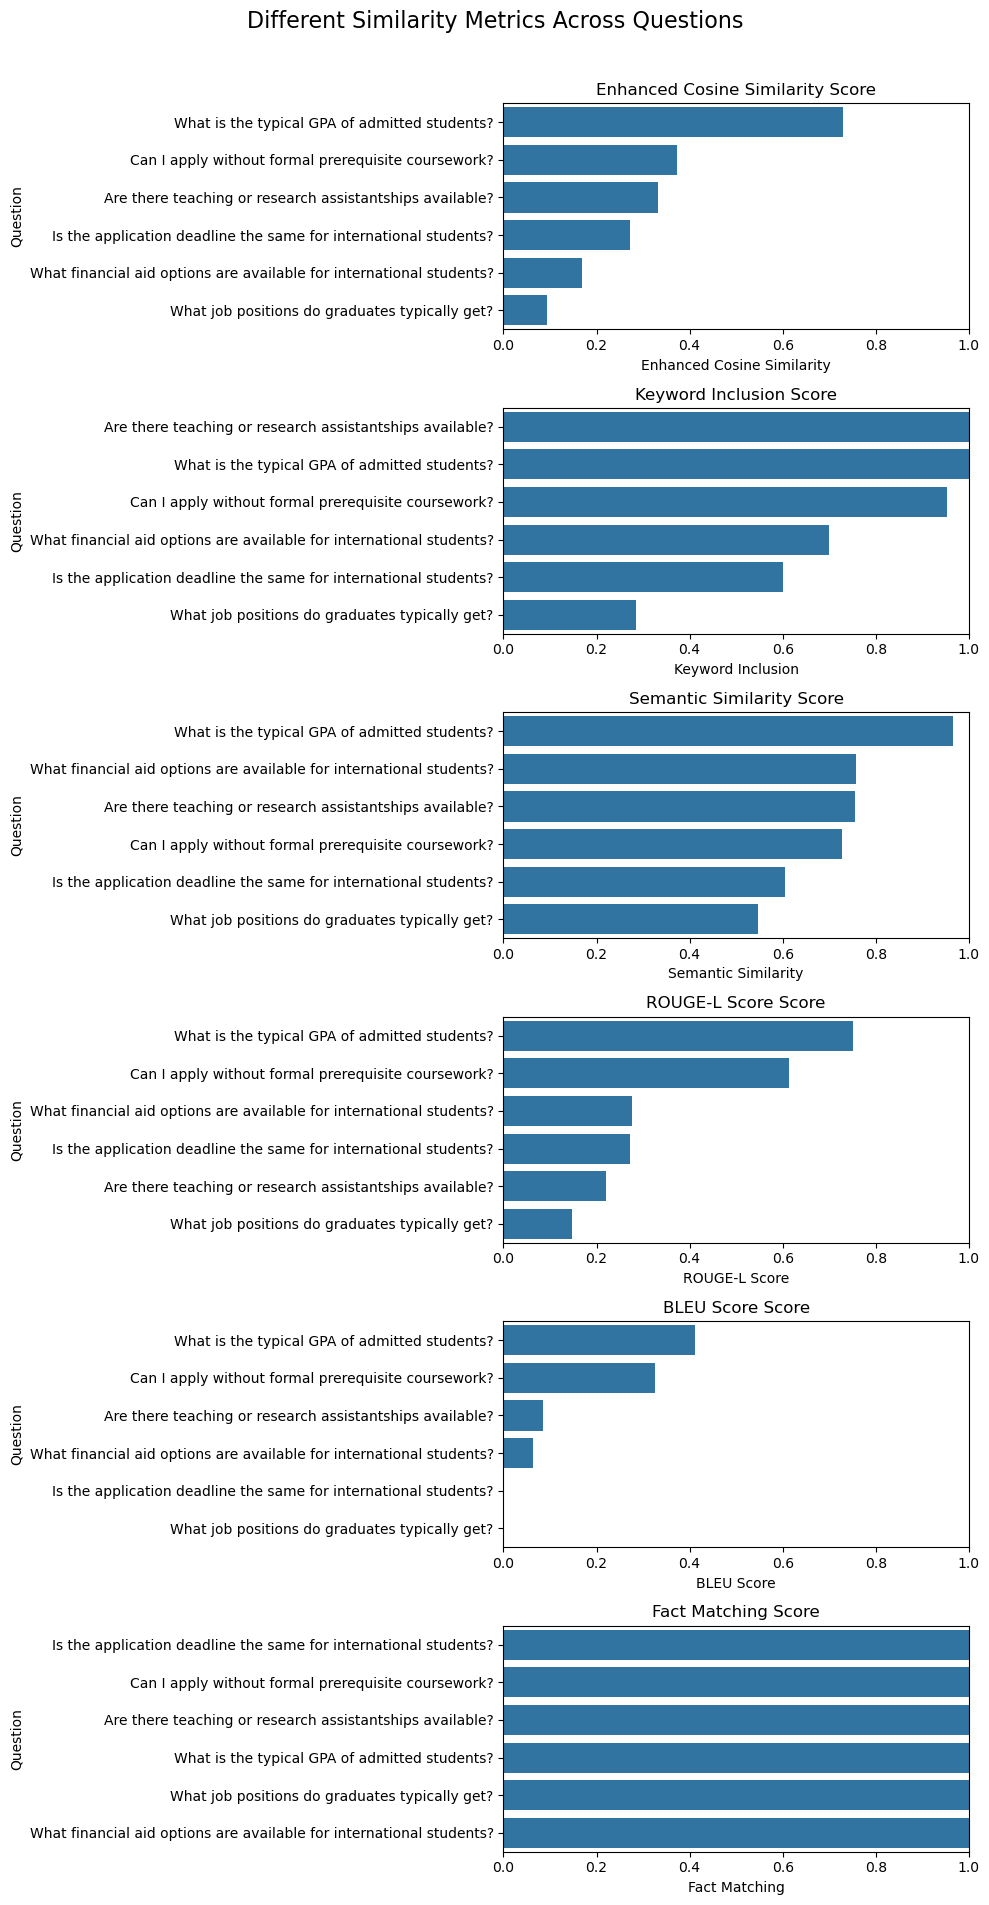

In [15]:
# Visualize the different metrics for each question
metrics = ['Enhanced Cosine Similarity', 'Keyword Inclusion', 
           'Semantic Similarity', 'ROUGE-L Score', 'BLEU Score', 'Fact Matching']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=len(metrics), figsize=(10, 20))
fig.suptitle('Different Similarity Metrics Across Questions', fontsize=16)

for i, metric in enumerate(metrics):
    # Sort by metric score
    df_sorted = results_df.sort_values(metric, ascending=False)
    
    # Create subplot
    sns.barplot(x=metric, y='Question', data=df_sorted, ax=axes[i])
    axes[i].set_xlim(0, 1)
    axes[i].set_title(f'{metric} Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
